In [32]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [59]:
ticker = 'AMZN'
start_date = '2018-01-01'
end_date = '2023-10-05'

In [60]:
df = yf.download(ticker, start_date, end_date).reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
1,2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2,2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
3,2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
4,2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...,...
1444,2023-09-28,124.040001,126.580002,123.040001,125.980003,125.980003,54555000
1445,2023-09-29,128.199997,129.149994,126.320000,127.120003,127.120003,62377600
1446,2023-10-02,127.279999,130.470001,126.540001,129.460007,129.460007,48029700
1447,2023-10-03,128.059998,128.520004,124.250000,124.720001,124.720001,51565000


In [61]:
close = df['Close']

In [62]:
print(close.values)

[ 59.45050049  60.20999908  60.47949982 ... 129.46000671 124.72000122
 127.        ]


In [63]:
scaler = MinMaxScaler()
data = scaler.fit_transform(close.values.reshape(-1, 1))
data

array([[0.        ],
       [0.00597466],
       [0.00809471],
       ...,
       [0.5507356 ],
       [0.51344795],
       [0.53138375]])

In [64]:
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]
train_data.shape, test_data.shape

((1159, 1), (290, 1))

In [65]:
test_data[20]

array([0.55356757])

In [66]:
past_values = 60
def data_preparation(data,past_values):
    X = []
    y = []
    for i in range(past_values, len(data)):
        X.append(data[i-60:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [67]:
X_train, y_train = data_preparation(train_data,past_values)
X_test, y_test = data_preparation(test_data,past_values)

In [68]:
X_train, y_train

(array([[[0.        ],
         [0.00597466],
         [0.00809471],
         ...,
         [0.14429279],
         [0.12116112],
         [0.09534691]],
 
        [[0.00597466],
         [0.00809471],
         [0.0157843 ],
         ...,
         [0.12116112],
         [0.09534691],
         [0.10160869]],
 
        [[0.00809471],
         [0.0157843 ],
         [0.02275801],
         ...,
         [0.09534691],
         [0.10160869],
         [0.07197138]],
 
        ...,
 
        [[0.38867607],
         [0.3612453 ],
         [0.37350533],
         ...,
         [0.58770851],
         [0.6298734 ],
         [0.6538665 ]],
 
        [[0.3612453 ],
         [0.37350533],
         [0.42168425],
         ...,
         [0.6298734 ],
         [0.6538665 ],
         [0.63994262]],
 
        [[0.37350533],
         [0.42168425],
         [0.40402771],
         ...,
         [0.6538665 ],
         [0.63994262],
         [0.62900807]]]),
 array([[0.10160869],
        [0.07197138],
        [0.

In [69]:
X_train.shape, y_train.shape

((1099, 60, 1), (1099, 1))

In [44]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

# callback = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=False,
#     start_from_epoch=0
# )
# model.fit(X_train, y_train, batch_size=200, epochs=500, verbose=1, callbacks=[callback])

Epoch 1/200
6/6 [==============================] - 10s 243ms/step - loss: 0.1572
Epoch 2/200
6/6 [==============================] - 1s 232ms/step - loss: 0.0342
Epoch 3/200
6/6 [==============================] - 1s 233ms/step - loss: 0.0249
Epoch 4/200
6/6 [==============================] - 1s 246ms/step - loss: 0.0110
Epoch 5/200
6/6 [==============================] - 2s 257ms/step - loss: 0.0096
Epoch 6/200
6/6 [==============================] - 2s 252ms/step - loss: 0.0075
Epoch 7/200
6/6 [==============================] - 1s 229ms/step - loss: 0.0047
Epoch 8/200
6/6 [==============================] - 2s 254ms/step - loss: 0.0040
Epoch 9/200
6/6 [==============================] - 1s 234ms/step - loss: 0.0039
Epoch 10/200
6/6 [==============================] - 1s 230ms/step - loss: 0.0037
Epoch 11/200
6/6 [==============================] - 1s 228ms/step - loss: 0.0037
Epoch 12/200
6/6 [==============================] - 2s 237ms/step - loss: 0.0036
Epoch 13/200
6/6 [==================

6/6 [==============================] - 1s 224ms/step - loss: 7.8582e-04
Epoch 200/200
6/6 [==============================] - 1s 226ms/step - loss: 7.1171e-04


In [45]:
pred_train = model.predict(X_train)

35/35 [==============================] - 3s 34ms/step


In [46]:
pred_train

array([[0.12735416],
       [0.11822801],
       [0.10654426],
       ...,
       [0.6157989 ],
       [0.63729125],
       [0.6462689 ]], dtype=float32)

In [47]:
mae = mean_absolute_error(y_train, pred_train)
print('mean absolute error-', mae)
mse = mean_squared_error(y_train, pred_train)
print('mean squared error-', mse)

mean absolute error- 0.019234539106364294
mean squared error- 0.0007069853837339182


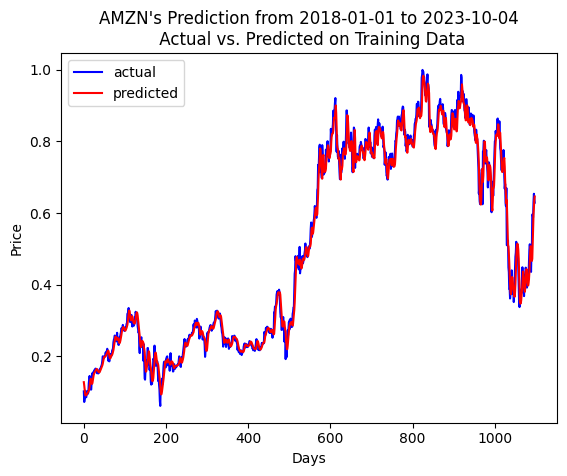

In [51]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(y_train, color='blue', label='actual')
plt.plot(pred_train, color='red', label='predicted')
plt.legend()

In [52]:
pred_test = model.predict(X_test)

8/8 [==============================] - 0s 39ms/step


In [53]:
mae = mean_absolute_error(y_test, pred_test)
print('mean absolute error-', mae)
mse = mean_squared_error(y_test, pred_test)
print('mean squared error-', mse)

mean absolute error- 0.01890476266811766
mean squared error- 0.0005886190440338737


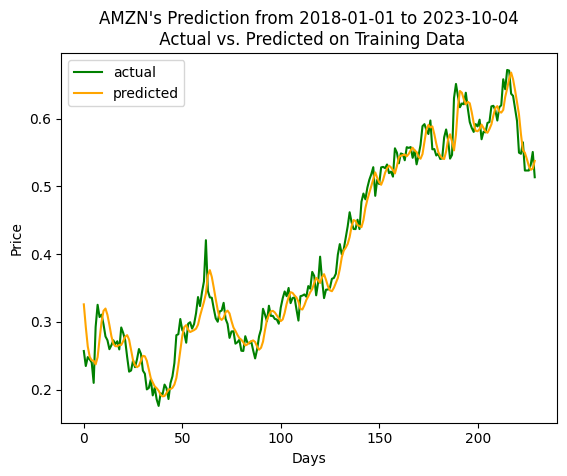

In [54]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(y_test, color='green', label='actual')
plt.plot(pred_test, color='orange', label='predicted')
plt.legend()

In [70]:
ticker = 'AMZN'
start_date = '2023-10-05'
end_date = '2023-12-30'
df_future = yf.download(ticker, start_date, end_date).reset_index()['Close']
df_future

[*********************100%***********************]  1 of 1 completed


0     125.959999
1     127.959999
2     128.259995
3     129.479996
4     131.830002
5     132.330002
6     129.789993
7     132.550003
8     131.470001
9     128.130005
10    128.399994
11    125.169998
12    126.559998
13    128.559998
14    121.389999
15    119.570000
16    127.739998
17    132.710007
18    133.089996
19    137.000000
20    138.070007
21    138.600006
22    139.740005
23    142.710007
24    142.080002
25    140.600006
26    143.559998
27    142.589996
28    145.800003
29    143.199997
30    142.830002
31    145.179993
32    146.130005
33    143.899994
34    146.710007
35    146.740005
36    147.729996
37    147.029999
38    146.320007
39    146.089996
40    147.029999
41    144.839996
42    146.880005
43    144.520004
44    146.880005
45    147.419998
46    145.889999
47    147.479996
48    148.839996
49    147.419998
50    149.970001
51    154.070007
52    153.789993
53    152.119995
54    153.839996
55    153.419998
56    153.410004
57    153.339996
58    153.3800

In [71]:
df_future = df_future.values

In [72]:
future_data_to_predict = np.array(close[-60:])
future_data_to_predict

array([130.80000305, 134.30000305, 134.67999268, 133.55999756,
       132.83000183, 135.36000061, 129.96000671, 130.        ,
       128.80000305, 129.13000488, 128.1499939 , 128.25      ,
       132.21000671, 133.67999268, 131.69000244, 128.21000671,
       128.91000366, 139.57000732, 142.22000122, 139.94000244,
       137.8500061 , 138.55999756, 138.41000366, 140.57000732,
       137.66999817, 135.07000732, 133.97999573, 133.22000122,
       134.67999268, 134.25      , 135.52000427, 131.83999634,
       133.25999451, 133.13999939, 134.91000366, 135.07000732,
       138.00999451, 138.11999512, 137.27000427, 135.36000061,
       137.8500061 , 138.22999573, 143.1000061 , 141.22999573,
       144.8500061 , 144.72000122, 140.38999939, 139.97999573,
       137.63000488, 135.28999329, 129.33000183, 129.11999512,
       131.27000427, 125.98000336, 125.98000336, 125.98000336,
       127.12000275, 129.46000671, 124.72000122, 127.        ])

In [73]:
last_val = future_data_to_predict[-1]
last_val

127.0

---------------------------------------------------------------------------------------------------------------------------

In [74]:
def prediction(future_data, last_val, days):
    
    output_data = []
    new_arr = []

    for i in range(days):
        
        if future_data[-1] == last_val:
            print('no')
            print('before',future_data)
            temp = scaler.transform(future_data.reshape(-1, 1))
            temp_scaled_reshape = temp.reshape(1, 60, 1)
            predicted_value = model.predict(temp_scaled_reshape)
            actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
            output_data.append(actual_predicted[0,0])
            print('output',actual_predicted[0,0])
            future_data = future_data[1:]
            future_data = np.append(future_data,actual_predicted)
            print('after',future_data)
        else:
            print('yes')
            print('before',future_data)
            temp = scaler.transform(future_data.reshape(-1, 1))
            temp_scaled_reshape = temp.reshape(1, 60, 1)
            predicted_value = model.predict(temp_scaled_reshape)
            actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
            output_data.append(actual_predicted[0,0])
            print('output',actual_predicted[0,0])
            future_data = future_data[1:]
            future_data = np.append(future_data,actual_predicted)
            print('after',future_data)

    return output_data
    

In [75]:
result = prediction(future_data_to_predict, last_val, len(df_future))
result = np.array(result)
result

no
before [130.80000305 134.30000305 134.67999268 133.55999756 132.83000183
 135.36000061 129.96000671 130.         128.80000305 129.13000488
 128.1499939  128.25       132.21000671 133.67999268 131.69000244
 128.21000671 128.91000366 139.57000732 142.22000122 139.94000244
 137.8500061  138.55999756 138.41000366 140.57000732 137.66999817
 135.07000732 133.97999573 133.22000122 134.67999268 134.25
 135.52000427 131.83999634 133.25999451 133.13999939 134.91000366
 135.07000732 138.00999451 138.11999512 137.27000427 135.36000061
 137.8500061  138.22999573 143.1000061  141.22999573 144.8500061
 144.72000122 140.38999939 139.97999573 137.63000488 135.28999329
 129.33000183 129.11999512 131.27000427 125.98000336 125.98000336
 125.98000336 127.12000275 129.46000671 124.72000122 127.        ]
1/1 [==============================] - 0s 79ms/step
output 127.15681
after [134.30000305 134.67999268 133.55999756 132.83000183 135.36000061
 129.96000671 130.         128.80000305 129.13000488 128.149993

1/1 [==============================] - 0s 63ms/step
output 127.6429
after [129.96000671 130.         128.80000305 129.13000488 128.1499939
 128.25       132.21000671 133.67999268 131.69000244 128.21000671
 128.91000366 139.57000732 142.22000122 139.94000244 137.8500061
 138.55999756 138.41000366 140.57000732 137.66999817 135.07000732
 133.97999573 133.22000122 134.67999268 134.25       135.52000427
 131.83999634 133.25999451 133.13999939 134.91000366 135.07000732
 138.00999451 138.11999512 137.27000427 135.36000061 137.8500061
 138.22999573 143.1000061  141.22999573 144.8500061  144.72000122
 140.38999939 139.97999573 137.63000488 135.28999329 129.33000183
 129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856]
yes
before [129.96000671 130.         128.80000305 129.13000488 128.1499939
 128.25       132.21000671 133.67999268 131.69000244 128.210

1/1 [==============================] - 0s 67ms/step
output 127.76066
after [128.25       132.21000671 133.67999268 131.69000244 128.21000671
 128.91000366 139.57000732 142.22000122 139.94000244 137.8500061
 138.55999756 138.41000366 140.57000732 137.66999817 135.07000732
 133.97999573 133.22000122 134.67999268 134.25       135.52000427
 131.83999634 133.25999451 133.13999939 134.91000366 135.07000732
 138.00999451 138.11999512 137.27000427 135.36000061 137.8500061
 138.22999573 143.1000061  141.22999573 144.8500061  144.72000122
 140.38999939 139.97999573 137.63000488 135.28999329 129.33000183
 129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856
 127.70079803 127.73750305 127.7571106  127.76350403 127.76065826]
yes
before [128.25       132.21000671 133.67999268 131.69000244 128.21000671
 128.91000366 139.57000732 142.22000122 139.94000244 137.

1/1 [==============================] - 0s 56ms/step
output 127.71553
after [128.91000366 139.57000732 142.22000122 139.94000244 137.8500061
 138.55999756 138.41000366 140.57000732 137.66999817 135.07000732
 133.97999573 133.22000122 134.67999268 134.25       135.52000427
 131.83999634 133.25999451 133.13999939 134.91000366 135.07000732
 138.00999451 138.11999512 137.27000427 135.36000061 137.8500061
 138.22999573 143.1000061  141.22999573 144.8500061  144.72000122
 140.38999939 139.97999573 137.63000488 135.28999329 129.33000183
 129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856
 127.70079803 127.73750305 127.7571106  127.76350403 127.76065826
 127.75222778 127.74137878 127.7305603  127.72157288 127.7155304 ]
yes
before [128.91000366 139.57000732 142.22000122 139.94000244 137.8500061
 138.55999756 138.41000366 140.57000732 137.66999817 135.0

1/1 [==============================] - 0s 50ms/step
output 127.73897
after [138.55999756 138.41000366 140.57000732 137.66999817 135.07000732
 133.97999573 133.22000122 134.67999268 134.25       135.52000427
 131.83999634 133.25999451 133.13999939 134.91000366 135.07000732
 138.00999451 138.11999512 137.27000427 135.36000061 137.8500061
 138.22999573 143.1000061  141.22999573 144.8500061  144.72000122
 140.38999939 139.97999573 137.63000488 135.28999329 129.33000183
 129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856
 127.70079803 127.73750305 127.7571106  127.76350403 127.76065826
 127.75222778 127.74137878 127.7305603  127.72157288 127.7155304
 127.71304321 127.71433258 127.71936035 127.72771454 127.7389679 ]
yes
before [138.55999756 138.41000366 140.57000732 137.66999817 135.07000732
 133.97999573 133.22000122 134.67999268 134.25       135.

1/1 [==============================] - 0s 65ms/step
output 127.82132
after [133.97999573 133.22000122 134.67999268 134.25       135.52000427
 131.83999634 133.25999451 133.13999939 134.91000366 135.07000732
 138.00999451 138.11999512 137.27000427 135.36000061 137.8500061
 138.22999573 143.1000061  141.22999573 144.8500061  144.72000122
 140.38999939 139.97999573 137.63000488 135.28999329 129.33000183
 129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856
 127.70079803 127.73750305 127.7571106  127.76350403 127.76065826
 127.75222778 127.74137878 127.7305603  127.72157288 127.7155304
 127.71304321 127.71433258 127.71936035 127.72771454 127.7389679
 127.75260925 127.76809692 127.78499603 127.80285645 127.82131958]
yes
before [133.97999573 133.22000122 134.67999268 134.25       135.52000427
 131.83999634 133.25999451 133.13999939 134.91000366 135.0

1/1 [==============================] - 0s 57ms/step
output 127.915726
after [131.83999634 133.25999451 133.13999939 134.91000366 135.07000732
 138.00999451 138.11999512 137.27000427 135.36000061 137.8500061
 138.22999573 143.1000061  141.22999573 144.8500061  144.72000122
 140.38999939 139.97999573 137.63000488 135.28999329 129.33000183
 129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856
 127.70079803 127.73750305 127.7571106  127.76350403 127.76065826
 127.75222778 127.74137878 127.7305603  127.72157288 127.7155304
 127.71304321 127.71433258 127.71936035 127.72771454 127.7389679
 127.75260925 127.76809692 127.78499603 127.80285645 127.82131958
 127.84012604 127.85907745 127.8780365  127.89691925 127.91572571]
yes
before [131.83999634 133.25999451 133.13999939 134.91000366 135.07000732
 138.00999451 138.11999512 137.27000427 135.36000061 137.

1/1 [==============================] - 0s 63ms/step
output 128.00868
after [138.00999451 138.11999512 137.27000427 135.36000061 137.8500061
 138.22999573 143.1000061  141.22999573 144.8500061  144.72000122
 140.38999939 139.97999573 137.63000488 135.28999329 129.33000183
 129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856
 127.70079803 127.73750305 127.7571106  127.76350403 127.76065826
 127.75222778 127.74137878 127.7305603  127.72157288 127.7155304
 127.71304321 127.71433258 127.71936035 127.72771454 127.7389679
 127.75260925 127.76809692 127.78499603 127.80285645 127.82131958
 127.84012604 127.85907745 127.8780365  127.89691925 127.91572571
 127.93442535 127.95304871 127.97159576 127.99012756 128.00868225]
yes
before [138.00999451 138.11999512 137.27000427 135.36000061 137.8500061
 138.22999573 143.1000061  141.22999573 144.8500061  144.72

1/1 [==============================] - 0s 86ms/step
output 128.10246
after [138.22999573 143.1000061  141.22999573 144.8500061  144.72000122
 140.38999939 139.97999573 137.63000488 135.28999329 129.33000183
 129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856
 127.70079803 127.73750305 127.7571106  127.76350403 127.76065826
 127.75222778 127.74137878 127.7305603  127.72157288 127.7155304
 127.71304321 127.71433258 127.71936035 127.72771454 127.7389679
 127.75260925 127.76809692 127.78499603 127.80285645 127.82131958
 127.84012604 127.85907745 127.8780365  127.89691925 127.91572571
 127.93442535 127.95304871 127.97159576 127.99012756 128.00868225
 128.02728271 128.04592896 128.06469727 128.08355713 128.10246277]
yes
before [138.22999573 143.1000061  141.22999573 144.8500061  144.72000122
 140.38999939 139.97999573 137.63000488 135.28999329 129.

1/1 [==============================] - 0s 88ms/step
output 128.19846
after [140.38999939 139.97999573 137.63000488 135.28999329 129.33000183
 129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856
 127.70079803 127.73750305 127.7571106  127.76350403 127.76065826
 127.75222778 127.74137878 127.7305603  127.72157288 127.7155304
 127.71304321 127.71433258 127.71936035 127.72771454 127.7389679
 127.75260925 127.76809692 127.78499603 127.80285645 127.82131958
 127.84012604 127.85907745 127.8780365  127.89691925 127.91572571
 127.93442535 127.95304871 127.97159576 127.99012756 128.00868225
 128.02728271 128.04592896 128.06469727 128.08355713 128.10246277
 128.121521   128.14065552 128.15985107 128.17912292 128.19845581]
yes
before [140.38999939 139.97999573 137.63000488 135.28999329 129.33000183
 129.11999512 131.27000427 125.98000336 125.98000336 125.

1/1 [==============================] - 0s 85ms/step
output 128.2951
after [129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856
 127.70079803 127.73750305 127.7571106  127.76350403 127.76065826
 127.75222778 127.74137878 127.7305603  127.72157288 127.7155304
 127.71304321 127.71433258 127.71936035 127.72771454 127.7389679
 127.75260925 127.76809692 127.78499603 127.80285645 127.82131958
 127.84012604 127.85907745 127.8780365  127.89691925 127.91572571
 127.93442535 127.95304871 127.97159576 127.99012756 128.00868225
 128.02728271 128.04592896 128.06469727 128.08355713 128.10246277
 128.121521   128.14065552 128.15985107 128.17912292 128.19845581
 128.21781921 128.23716736 128.25653076 128.27584839 128.29510498]
yes
before [129.11999512 131.27000427 125.98000336 125.98000336 125.98000336
 127.12000275 129.46000671 124.72000122 127.         127.1

1/1 [==============================] - 0s 69ms/step
output 128.39024
after [127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.64289856
 127.70079803 127.73750305 127.7571106  127.76350403 127.76065826
 127.75222778 127.74137878 127.7305603  127.72157288 127.7155304
 127.71304321 127.71433258 127.71936035 127.72771454 127.7389679
 127.75260925 127.76809692 127.78499603 127.80285645 127.82131958
 127.84012604 127.85907745 127.8780365  127.89691925 127.91572571
 127.93442535 127.95304871 127.97159576 127.99012756 128.00868225
 128.02728271 128.04592896 128.06469727 128.08355713 128.10246277
 128.121521   128.14065552 128.15985107 128.17912292 128.19845581
 128.21781921 128.23716736 128.25653076 128.27584839 128.29510498
 128.31427002 128.33338928 128.35243225 128.37138367 128.39024353]
yes
before [127.12000275 129.46000671 124.72000122 127.         127.15680695
 127.14408875 127.28718567 127.43991089 127.55841064 127.

array([127.15681 , 127.14409 , 127.287186, 127.43991 , 127.55841 ,
       127.6429  , 127.7008  , 127.7375  , 127.75711 , 127.763504,
       127.76066 , 127.75223 , 127.74138 , 127.73056 , 127.72157 ,
       127.71553 , 127.71304 , 127.71433 , 127.71936 , 127.727715,
       127.73897 , 127.75261 , 127.7681  , 127.784996, 127.80286 ,
       127.82132 , 127.840126, 127.85908 , 127.87804 , 127.89692 ,
       127.915726, 127.934425, 127.95305 , 127.971596, 127.99013 ,
       128.00868 , 128.02728 , 128.04593 , 128.0647  , 128.08356 ,
       128.10246 , 128.12152 , 128.14066 , 128.15985 , 128.17912 ,
       128.19846 , 128.21782 , 128.23717 , 128.25653 , 128.27585 ,
       128.2951  , 128.31427 , 128.33339 , 128.35243 , 128.37138 ,
       128.39024 , 128.40904 , 128.42775 , 128.44638 , 128.46494 ],
      dtype=float32)

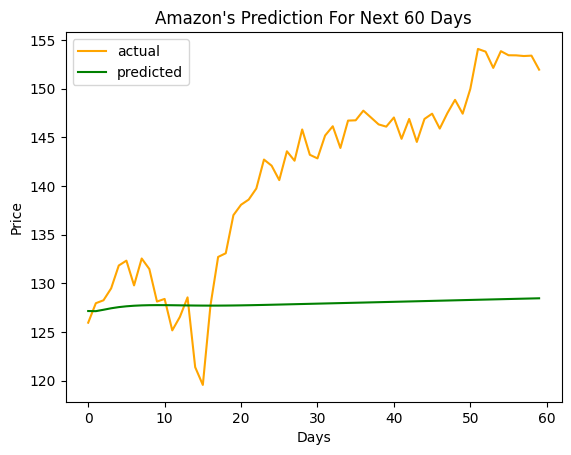

In [76]:
plt.title(f"Amazon's Prediction For Next {len(df_future)} Days")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df_future, color='orange', label='actual')
plt.plot(result, color='green', label='predicted')
plt.legend()

In [77]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    print("*******************",np.where(controls))
    
    inds = np.where(controls)[0]
    print(inds)
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [78]:
controls_actual = get_control_vector(df_future)
amount_actual = buy_and_sell_bot(df_future, controls_actual)
controls_actual,amount_actual

******************* (array([ 4,  5,  6,  8,  9, 10, 12, 14, 22, 24, 25, 26, 27, 29, 31, 32, 35,
       38, 39, 40, 41, 42, 44, 45, 47, 48, 50, 52, 53, 56, 57],
      dtype=int64),)
[ 4  5  6  8  9 10 12 14 22 24 25 26 27 29 31 32 35 38 39 40 41 42 44 45
 47 48 50 52 53 56 57]


(array([ 0.,  0.,  0.,  0., -2.,  2., -2.,  0.,  2., -2.,  2.,  0., -2.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  2., -2.,
         2., -2.,  0.,  2.,  0., -2.,  2.,  0.,  0., -2.,  0.,  0.,  2.,
        -2.,  2., -2.,  2.,  0., -2.,  2.,  0., -2.,  2.,  0., -2.,  0.,
         2., -2.,  0.,  0.,  2., -2.]),
 [1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1021.265196921155,
  1021.265196921155,
  1021.265196921155,
  1023.4171548756274,
  1023.4171548756274,
  1023.4171548756274,
  1051.1345278974068,
  1051.1345278974068,
  1051.1345278974068,
  1051.1345278974068,
  1051.1345278974068,
  1051.1345278974068,
  1051.1345278974068,
  1051.1345278974068,
  1051.1345278974068,
  1051.1345278974068,
  1254.5572962806475,
  1254.5572962806475,
  1254.5572962806475,
  1280.9689514420463,
  1280.9689514420463,
  1309.8063105835706,
  1309.8063105835706,
  1309.8063105835706,
  1309.8063105835706,
  1340.068613788258,
  1340.068613788258,
  1340.06861378

In [79]:
controls_pred= get_control_vector(np.array(result))
amount_pred = buy_and_sell_bot(result, controls_pred)
controls_pred,amount_pred

******************* (array([ 0,  8, 15], dtype=int64),)
[ 0  8 15]


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
 [1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
  1004.8717584066756,
 

In [80]:
df_future

array([125.95999908, 127.95999908, 128.25999451, 129.47999573,
       131.83000183, 132.33000183, 129.78999329, 132.55000305,
       131.47000122, 128.13000488, 128.3999939 , 125.16999817,
       126.55999756, 128.55999756, 121.38999939, 119.56999969,
       127.73999786, 132.71000671, 133.08999634, 137.        ,
       138.07000732, 138.6000061 , 139.74000549, 142.71000671,
       142.08000183, 140.6000061 , 143.55999756, 142.58999634,
       145.80000305, 143.19999695, 142.83000183, 145.17999268,
       146.13000488, 143.8999939 , 146.71000671, 146.74000549,
       147.72999573, 147.02999878, 146.32000732, 146.08999634,
       147.02999878, 144.83999634, 146.88000488, 144.52000427,
       146.88000488, 147.41999817, 145.88999939, 147.47999573,
       148.83999634, 147.41999817, 149.97000122, 154.07000732,
       153.78999329, 152.11999512, 153.83999634, 153.41999817,
       153.41000366, 153.33999634, 153.38000488, 151.94000244])

In [81]:
result = np.array(result)
result

array([127.15681 , 127.14409 , 127.287186, 127.43991 , 127.55841 ,
       127.6429  , 127.7008  , 127.7375  , 127.75711 , 127.763504,
       127.76066 , 127.75223 , 127.74138 , 127.73056 , 127.72157 ,
       127.71553 , 127.71304 , 127.71433 , 127.71936 , 127.727715,
       127.73897 , 127.75261 , 127.7681  , 127.784996, 127.80286 ,
       127.82132 , 127.840126, 127.85908 , 127.87804 , 127.89692 ,
       127.915726, 127.934425, 127.95305 , 127.971596, 127.99013 ,
       128.00868 , 128.02728 , 128.04593 , 128.0647  , 128.08356 ,
       128.10246 , 128.12152 , 128.14066 , 128.15985 , 128.17912 ,
       128.19846 , 128.21782 , 128.23717 , 128.25653 , 128.27585 ,
       128.2951  , 128.31427 , 128.33339 , 128.35243 , 128.37138 ,
       128.39024 , 128.40904 , 128.42775 , 128.44638 , 128.46494 ],
      dtype=float32)

# --------------------------------------------------------------------------------------------------------------

In [88]:
ticker = 'AMZN'
start_date = '2023-10-05'
end_date = '2023-12-30'
x = yf.download(ticker, start_date, end_date).reset_index()
x

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-05,126.709999,126.730003,124.330002,125.959999,125.959999,39660600
1,2023-10-06,124.160004,128.449997,124.129997,127.959999,127.959999,46795900
2,2023-10-09,126.220001,128.789993,124.760002,128.259995,128.259995,38773700
3,2023-10-10,128.820007,130.740005,128.050003,129.479996,129.479996,42178600
4,2023-10-11,129.740005,132.050003,129.610001,131.830002,131.830002,40741800
5,2023-10-12,132.169998,134.479996,131.229996,132.330002,132.330002,55528600
6,2023-10-13,132.979996,133.309998,128.949997,129.789993,129.789993,45786600
7,2023-10-16,130.690002,133.070007,130.429993,132.550003,132.550003,42832900
8,2023-10-17,130.389999,132.580002,128.710007,131.470001,131.470001,49344600
9,2023-10-18,129.899994,130.669998,127.510002,128.130005,128.130005,42699500


In [89]:
x = x['Close'].values
x

array([125.95999908, 127.95999908, 128.25999451, 129.47999573,
       131.83000183, 132.33000183, 129.78999329, 132.55000305,
       131.47000122, 128.13000488, 128.3999939 , 125.16999817,
       126.55999756, 128.55999756, 121.38999939, 119.56999969,
       127.73999786, 132.71000671, 133.08999634, 137.        ,
       138.07000732, 138.6000061 , 139.74000549, 142.71000671,
       142.08000183, 140.6000061 , 143.55999756, 142.58999634,
       145.80000305, 143.19999695, 142.83000183, 145.17999268,
       146.13000488, 143.8999939 , 146.71000671, 146.74000549,
       147.72999573, 147.02999878, 146.32000732, 146.08999634,
       147.02999878, 144.83999634, 146.88000488, 144.52000427,
       146.88000488, 147.41999817, 145.88999939, 147.47999573,
       148.83999634, 147.41999817, 149.97000122, 154.07000732,
       153.78999329, 152.11999512, 153.83999634, 153.41999817,
       153.41000366, 153.33999634, 153.38000488, 151.94000244])

In [90]:
x[-1]

151.94000244140625

In [91]:
days = 1

In [92]:
def prediction(future_data, last_val, days):
    
    output_data = []
    new_arr = []
        
    if future_data[-1] == last_val:
        print('no')
        print('before',future_data)
        temp = scaler.transform(future_data.reshape(-1, 1))
        temp_scaled_reshape = temp.reshape(1, 60, 1)
        predicted_value = model.predict(temp_scaled_reshape)
        actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
        output_data.append(actual_predicted[0,0])
        print('output',actual_predicted[0,0])
        future_data = future_data[1:]
        future_data = np.append(future_data,actual_predicted)
        print('after',future_data)
    else:
        print('yes')
        print('before',future_data)
        temp = scaler.transform(future_data.reshape(-1, 1))
        temp_scaled_reshape = temp.reshape(1, 60, 1)
        predicted_value = model.predict(temp_scaled_reshape)
        actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
        output_data.append(actual_predicted[0,0])
        print('output',actual_predicted[0,0])
        future_data = future_data[1:]
        future_data = np.append(future_data,actual_predicted)
        print('after',future_data)

    return output_data

In [93]:
prediction(x, x[-1], days)

no
before [125.95999908 127.95999908 128.25999451 129.47999573 131.83000183
 132.33000183 129.78999329 132.55000305 131.47000122 128.13000488
 128.3999939  125.16999817 126.55999756 128.55999756 121.38999939
 119.56999969 127.73999786 132.71000671 133.08999634 137.
 138.07000732 138.6000061  139.74000549 142.71000671 142.08000183
 140.6000061  143.55999756 142.58999634 145.80000305 143.19999695
 142.83000183 145.17999268 146.13000488 143.8999939  146.71000671
 146.74000549 147.72999573 147.02999878 146.32000732 146.08999634
 147.02999878 144.83999634 146.88000488 144.52000427 146.88000488
 147.41999817 145.88999939 147.47999573 148.83999634 147.41999817
 149.97000122 154.07000732 153.78999329 152.11999512 153.83999634
 153.41999817 153.41000366 153.33999634 153.38000488 151.94000244]
1/1 [==============================] - 0s 54ms/step
output 152.13936
after [127.95999908 128.25999451 129.47999573 131.83000183 132.33000183
 129.78999329 132.55000305 131.47000122 128.13000488 128.3999939

[152.13936]